In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [44]:
df = pd.read_excel('C:/Program Files/python 3.9/cleaned_car_data.xlsx')

In [45]:
df.shape

(1580, 19)

In [46]:
df.head()

,Full Title,Car Name,URL,Price (in Lakhs),Location,City,Registration Year,Insurance,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine,Transmission,Power,Drive Type,Mileage,Year of Manufacture
0,2020 BMW X3 xDrive 30i Luxury Line,BMW X3,https://www.cardekho.com/used-car-details/used...,44.00,"Sector 21e, Gurgaon",Gurgaon,Dec 2020,Expired,Petrol,5,39500,HR98,First Owner,1628.9,Automatic,132.634561,FWD,18.898734,2020
1,2024 BMW X5 xDrive40i M Sport,BMW X5,https://www.cardekho.com/used-car-details/used...,110.00,"Patparganj, New Delhi",New Delhi,Jul 2024,Expired,Petrol,5,3500,Jalandhar,First Owner,2998.0,Automatic,375.480000,4WD,18.898734,2024
2,2020 Kia Seltos HTK Diesel,Kia Seltos,https://www.cardekho.com/used-car-details/used...,8.99,"Chittranjan Park, New Delhi",New Delhi,Jun 2020,Expired,Diesel,5,34500,Gurgaon,First Owner,1493.0,Manual,113.430000,FWD,20.800000,2020
3,2024 Kia Seltos HTX IVT,Kia Seltos,https://www.cardekho.com/used-car-details/used...,17.40,"Karol Bagh, New Delhi",New Delhi,May 2024,Comprehensive,Petrol,5,5700,New Delhi,First Owner,1497.0,Automatic,113.420000,2WD,17.700000,2024
4,2022 Hyundai Venue S BSVI,Hyundai Venue,https://www.cardekho.com/used-car-details/used...,8.00,"Preet Vihar, New Delhi",New Delhi,Apr 2022,Comprehensive,Petrol,5,12000,New Delhi,First Owner,1197.0,Manual,81.800000,FWD,16.000000,2022


In [47]:
# Get the number of unique values in each column
unique_values_count = df.nunique()

# Display the result
print(unique_values_count)


Full Title             1242
Car Name                185
URL                    1478
Price (in Lakhs)        606
Location                208
City                     12
Registration Year       190
Insurance                 4
Fuel Type                 4
Seats                     7
Kms Driven              796
RTO                     167
Ownership                 4
Engine                   96
Transmission              2
Power                   277
Drive Type               12
Mileage                 296
Year of Manufacture      20
dtype: int64


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Full Title           1580 non-null   object 
 1   Car Name             1580 non-null   object 
 2   URL                  1580 non-null   object 
 3   Price (in Lakhs)     1580 non-null   float64
 4   Location             1580 non-null   object 
 5   City                 1580 non-null   object 
 6   Registration Year    1580 non-null   object 
 7   Insurance            1580 non-null   object 
 8   Fuel Type            1580 non-null   object 
 9   Seats                1580 non-null   int64  
 10  Kms Driven           1580 non-null   int64  
 11  RTO                  1580 non-null   object 
 12  Ownership            1580 non-null   object 
 13  Engine               1580 non-null   float64
 14  Transmission         1580 non-null   object 
 15  Power                1580 non-null   f

In [49]:
df.isnull().sum()

Full Title             0
Car Name               0
URL                    0
Price (in Lakhs)       0
Location               0
City                   0
Registration Year      0
Insurance              0
Fuel Type              0
Seats                  0
Kms Driven             0
RTO                    0
Ownership              0
Engine                 0
Transmission           0
Power                  0
Drive Type             0
Mileage                0
Year of Manufacture    0
dtype: int64

In [50]:
df = df.drop(columns=['Full Title', 'URL', 'Location', 'RTO', 'Insurance','Registration Year'])

In [51]:
df['Car Age'] = 2025 - df['Year of Manufacture']

In [52]:
df.shape

(1580, 14)

In [53]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print(df.shape)


(1465, 14)


In [54]:
df.head()

,Car Name,Price (in Lakhs),City,Fuel Type,Seats,Kms Driven,Ownership,Engine,Transmission,Power,Drive Type,Mileage,Year of Manufacture,Car Age
0,BMW X3,44.00,Gurgaon,Petrol,5,39500,First Owner,1628.9,Automatic,132.634561,FWD,18.898734,2020,5
1,BMW X5,110.00,New Delhi,Petrol,5,3500,First Owner,2998.0,Automatic,375.480000,4WD,18.898734,2024,1
2,Kia Seltos,8.99,New Delhi,Diesel,5,34500,First Owner,1493.0,Manual,113.430000,FWD,20.800000,2020,5
3,Kia Seltos,17.40,New Delhi,Petrol,5,5700,First Owner,1497.0,Automatic,113.420000,2WD,17.700000,2024,1
4,Hyundai Venue,8.00,New Delhi,Petrol,5,12000,First Owner,1197.0,Manual,81.800000,FWD,16.000000,2022,3


In [55]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(num_cols)
print(cat_cols)

['Price (in Lakhs)', 'Seats', 'Kms Driven', 'Engine', 'Power', 'Mileage', 'Year of Manufacture', 'Car Age']
['Car Name', 'City', 'Fuel Type', 'Ownership', 'Transmission', 'Drive Type']


In [56]:
df['Seats'].value_counts()

Seats
5     1224
7      200
4       17
6       13
8        9
2        1
13       1
Name: count, dtype: int64

In [57]:
df['Car Name'].value_counts()

Car Name
Maruti Swift         58
Honda City           57
Hyundai i20          49
Maruti Baleno        40
Hyundai Grand        39
                     ..
Honda Mobilio         1
Nissan Micra          1
Chevrolet Beat        1
Toyota Corolla        1
Mercedes-Benz CLA     1
Name: count, Length: 185, dtype: int64

In [58]:
df['City'].value_counts()

City
Jaipur         316
Chennai        299
Bangalore      183
New Delhi      147
Hyderabad      140
Ahmedabad       80
Gurgaon         80
Pune            78
Chandigarh      66
Mumbai          65
Thane           10
Navi Mumbai      1
Name: count, dtype: int64

In [59]:
df['Fuel Type'].value_counts()

Fuel Type
Petrol      856
Diesel      592
Electric     11
CNG           6
Name: count, dtype: int64

In [60]:
df['Ownership'].value_counts()

Ownership
First Owner     1189
Second Owner     257
Third Owner       17
Fourth Owner       2
Name: count, dtype: int64

In [61]:
df['Transmission'].value_counts()

Transmission
Manual       820
Automatic    645
Name: count, dtype: int64

In [62]:
df['Drive Type'].value_counts()

Drive Type
FWD                                         1141
AWD                                          132
4WD                                           73
RWD                                           65
2WD                                           25
4X2                                           13
4X4                                            8
4x2                                            4
4x4                                            1
Permanent all-wheel drive quattro              1
Rear Wheel Drive with ESP                      1
All-wheel drive with Electronic Traction       1
Name: count, dtype: int64

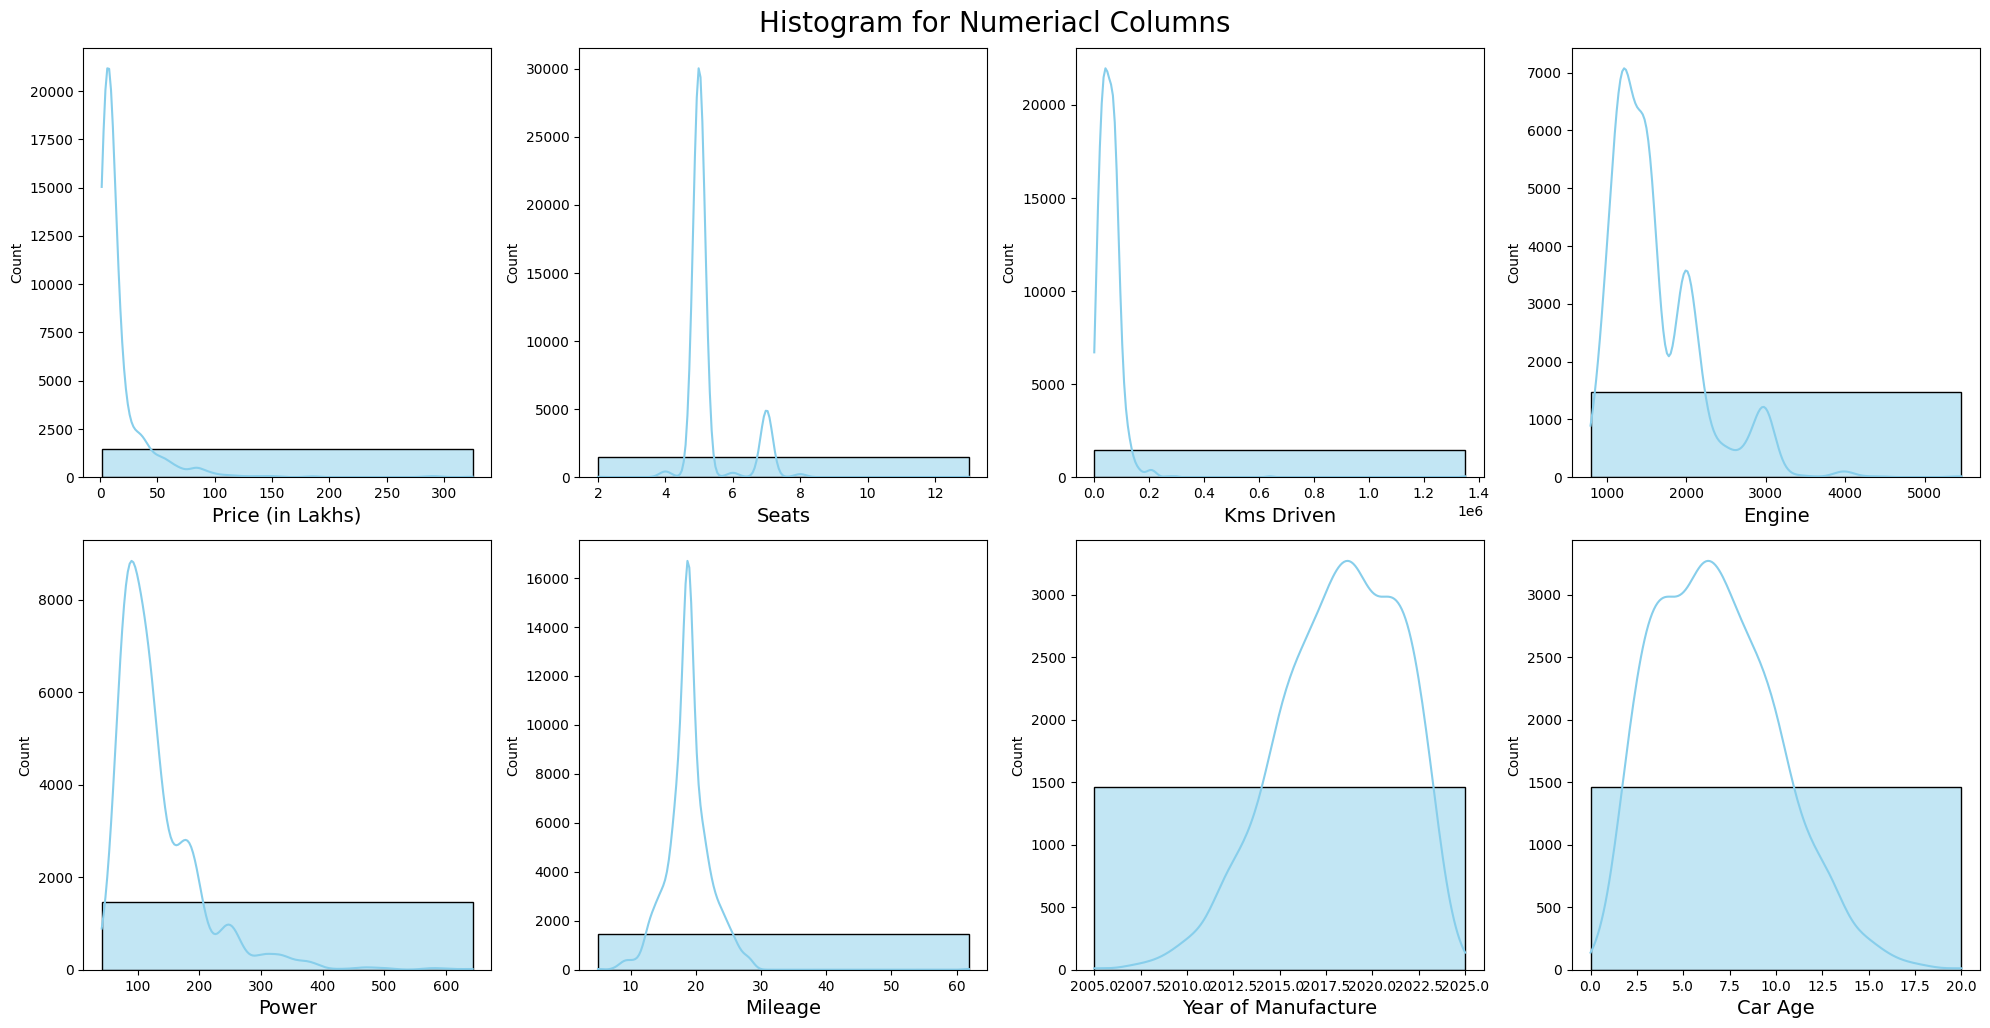

In [63]:
plt.figure(figsize=(20,20))
pt = 1
for column in num_cols:
    ax = plt.subplot(4, 4, pt)
    sns.histplot(df[column], ax=ax, bins=True, kde=True, color='skyblue')
    ax.set_xlabel(column, fontsize=14)
    pt+=1

plt.suptitle("Histogram for Numeriacl Columns", fontsize=20, ha = 'center')
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

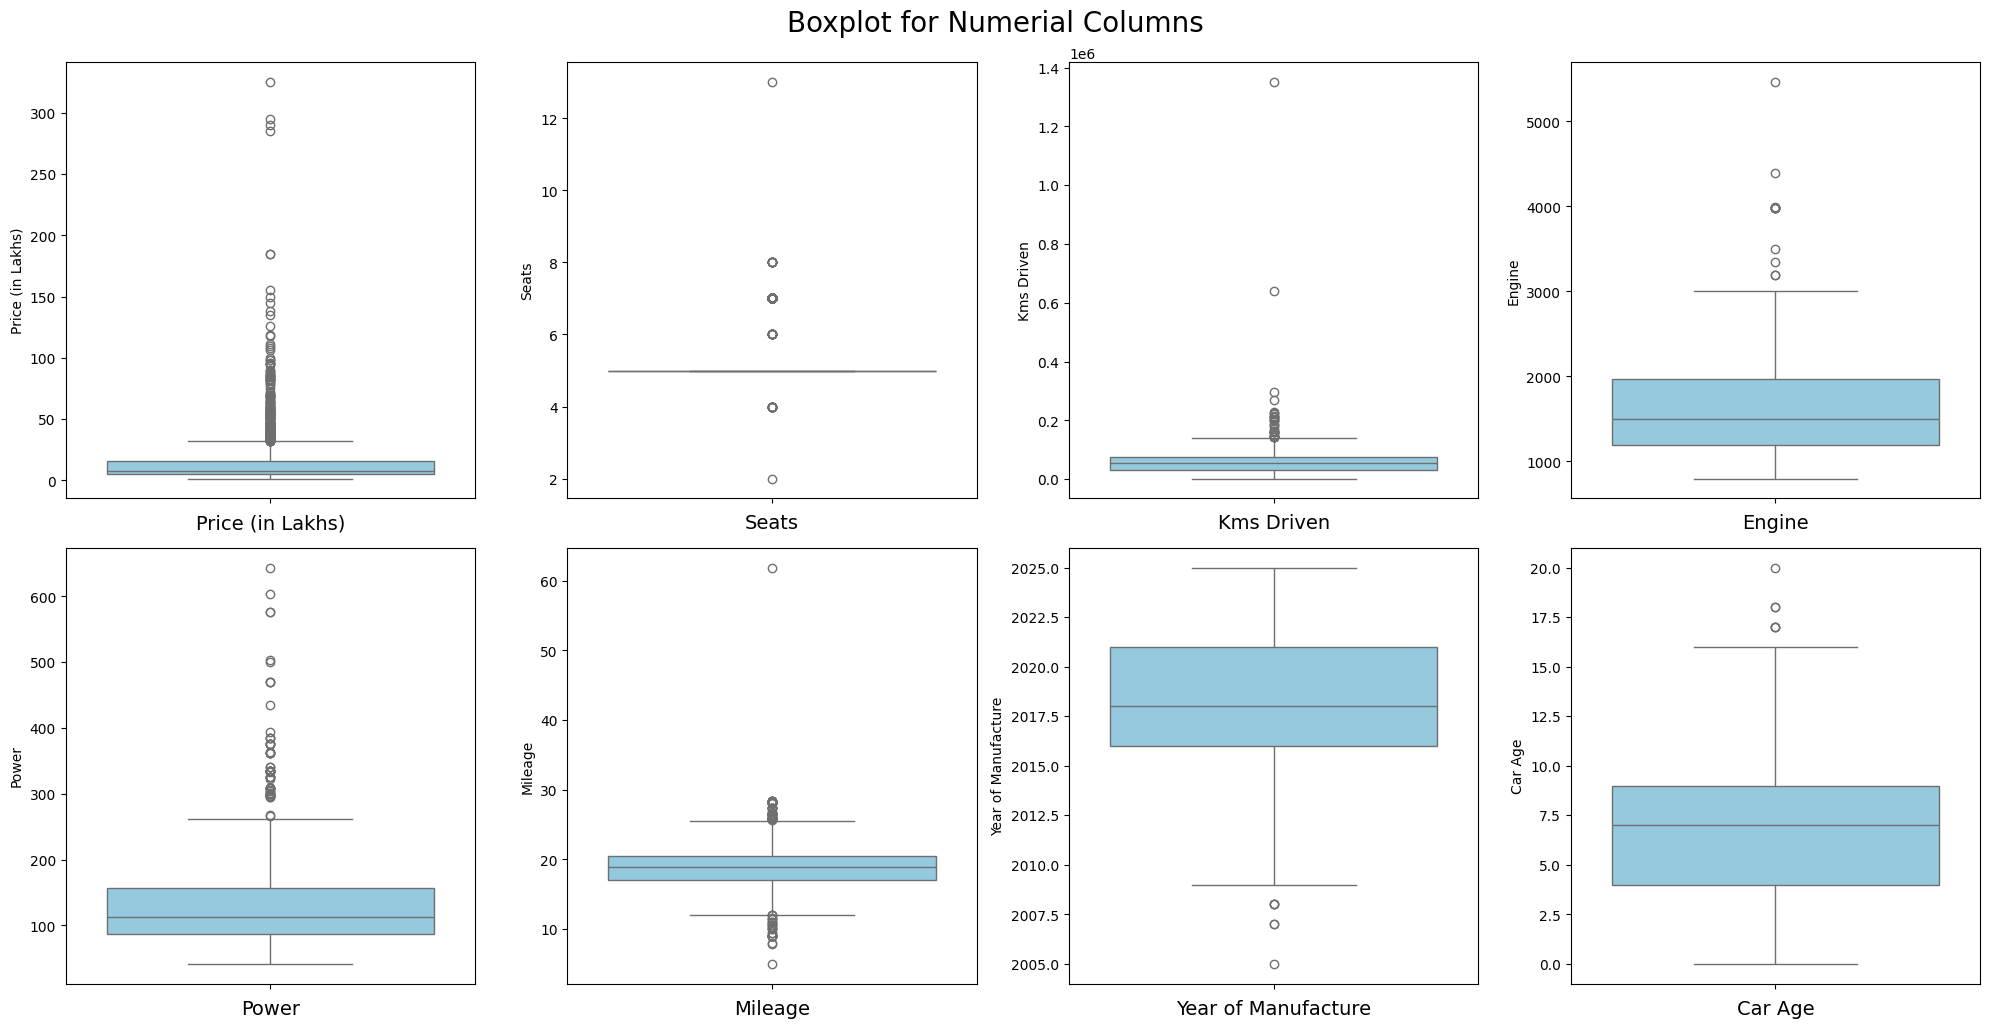

In [64]:
plt.figure(figsize=(20,20))
pt=1
for column in num_cols:
    ax = plt.subplot(4,4,pt)
    sns.boxplot(df[column], ax=ax, color='skyblue')
    ax.set_xlabel(column, fontsize=14)
    pt+=1

plt.suptitle("Boxplot for Numerial Columns", fontsize=20, ha='center')
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

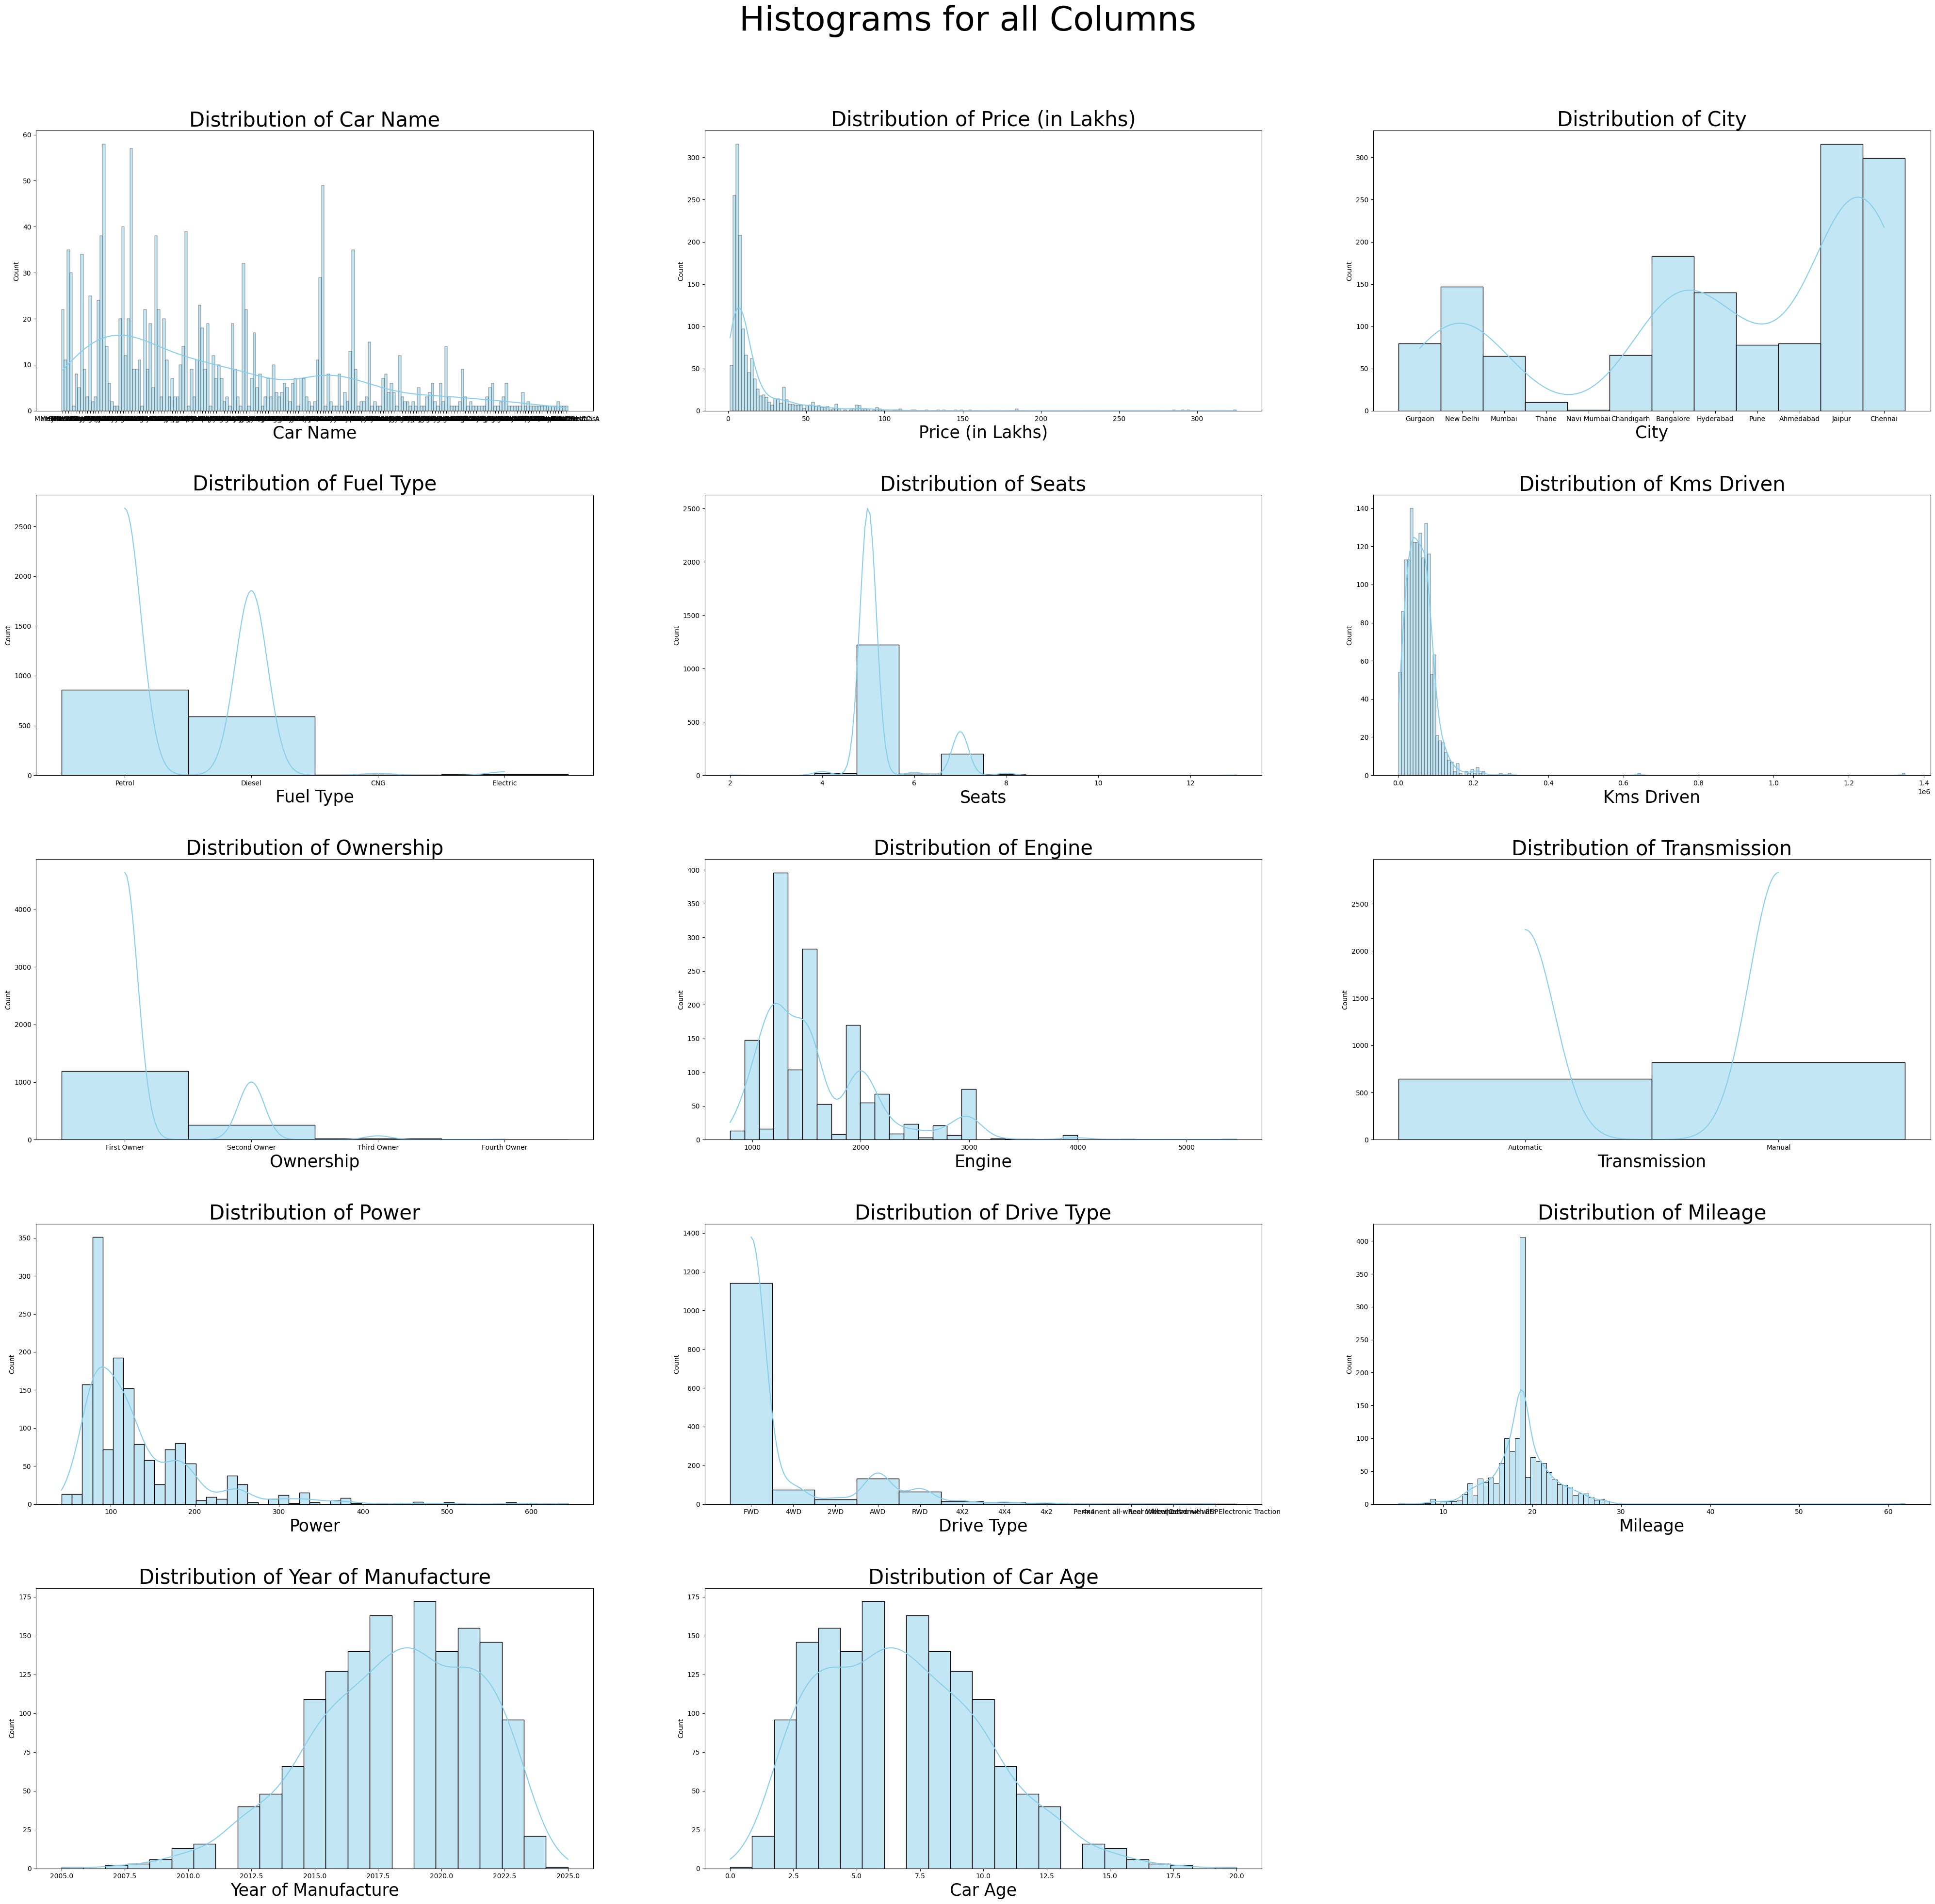

In [65]:
# Set up the size of the plots
plt.figure(figsize=(40,40))

# Loop through each feature and create a distribution plot
for i, column in enumerate(df.columns):
    plt.subplot(5, 3, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=30)
    plt.xlabel(column, fontsize=25)

    

plt.suptitle('Histograms for all Columns', fontsize=50, ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

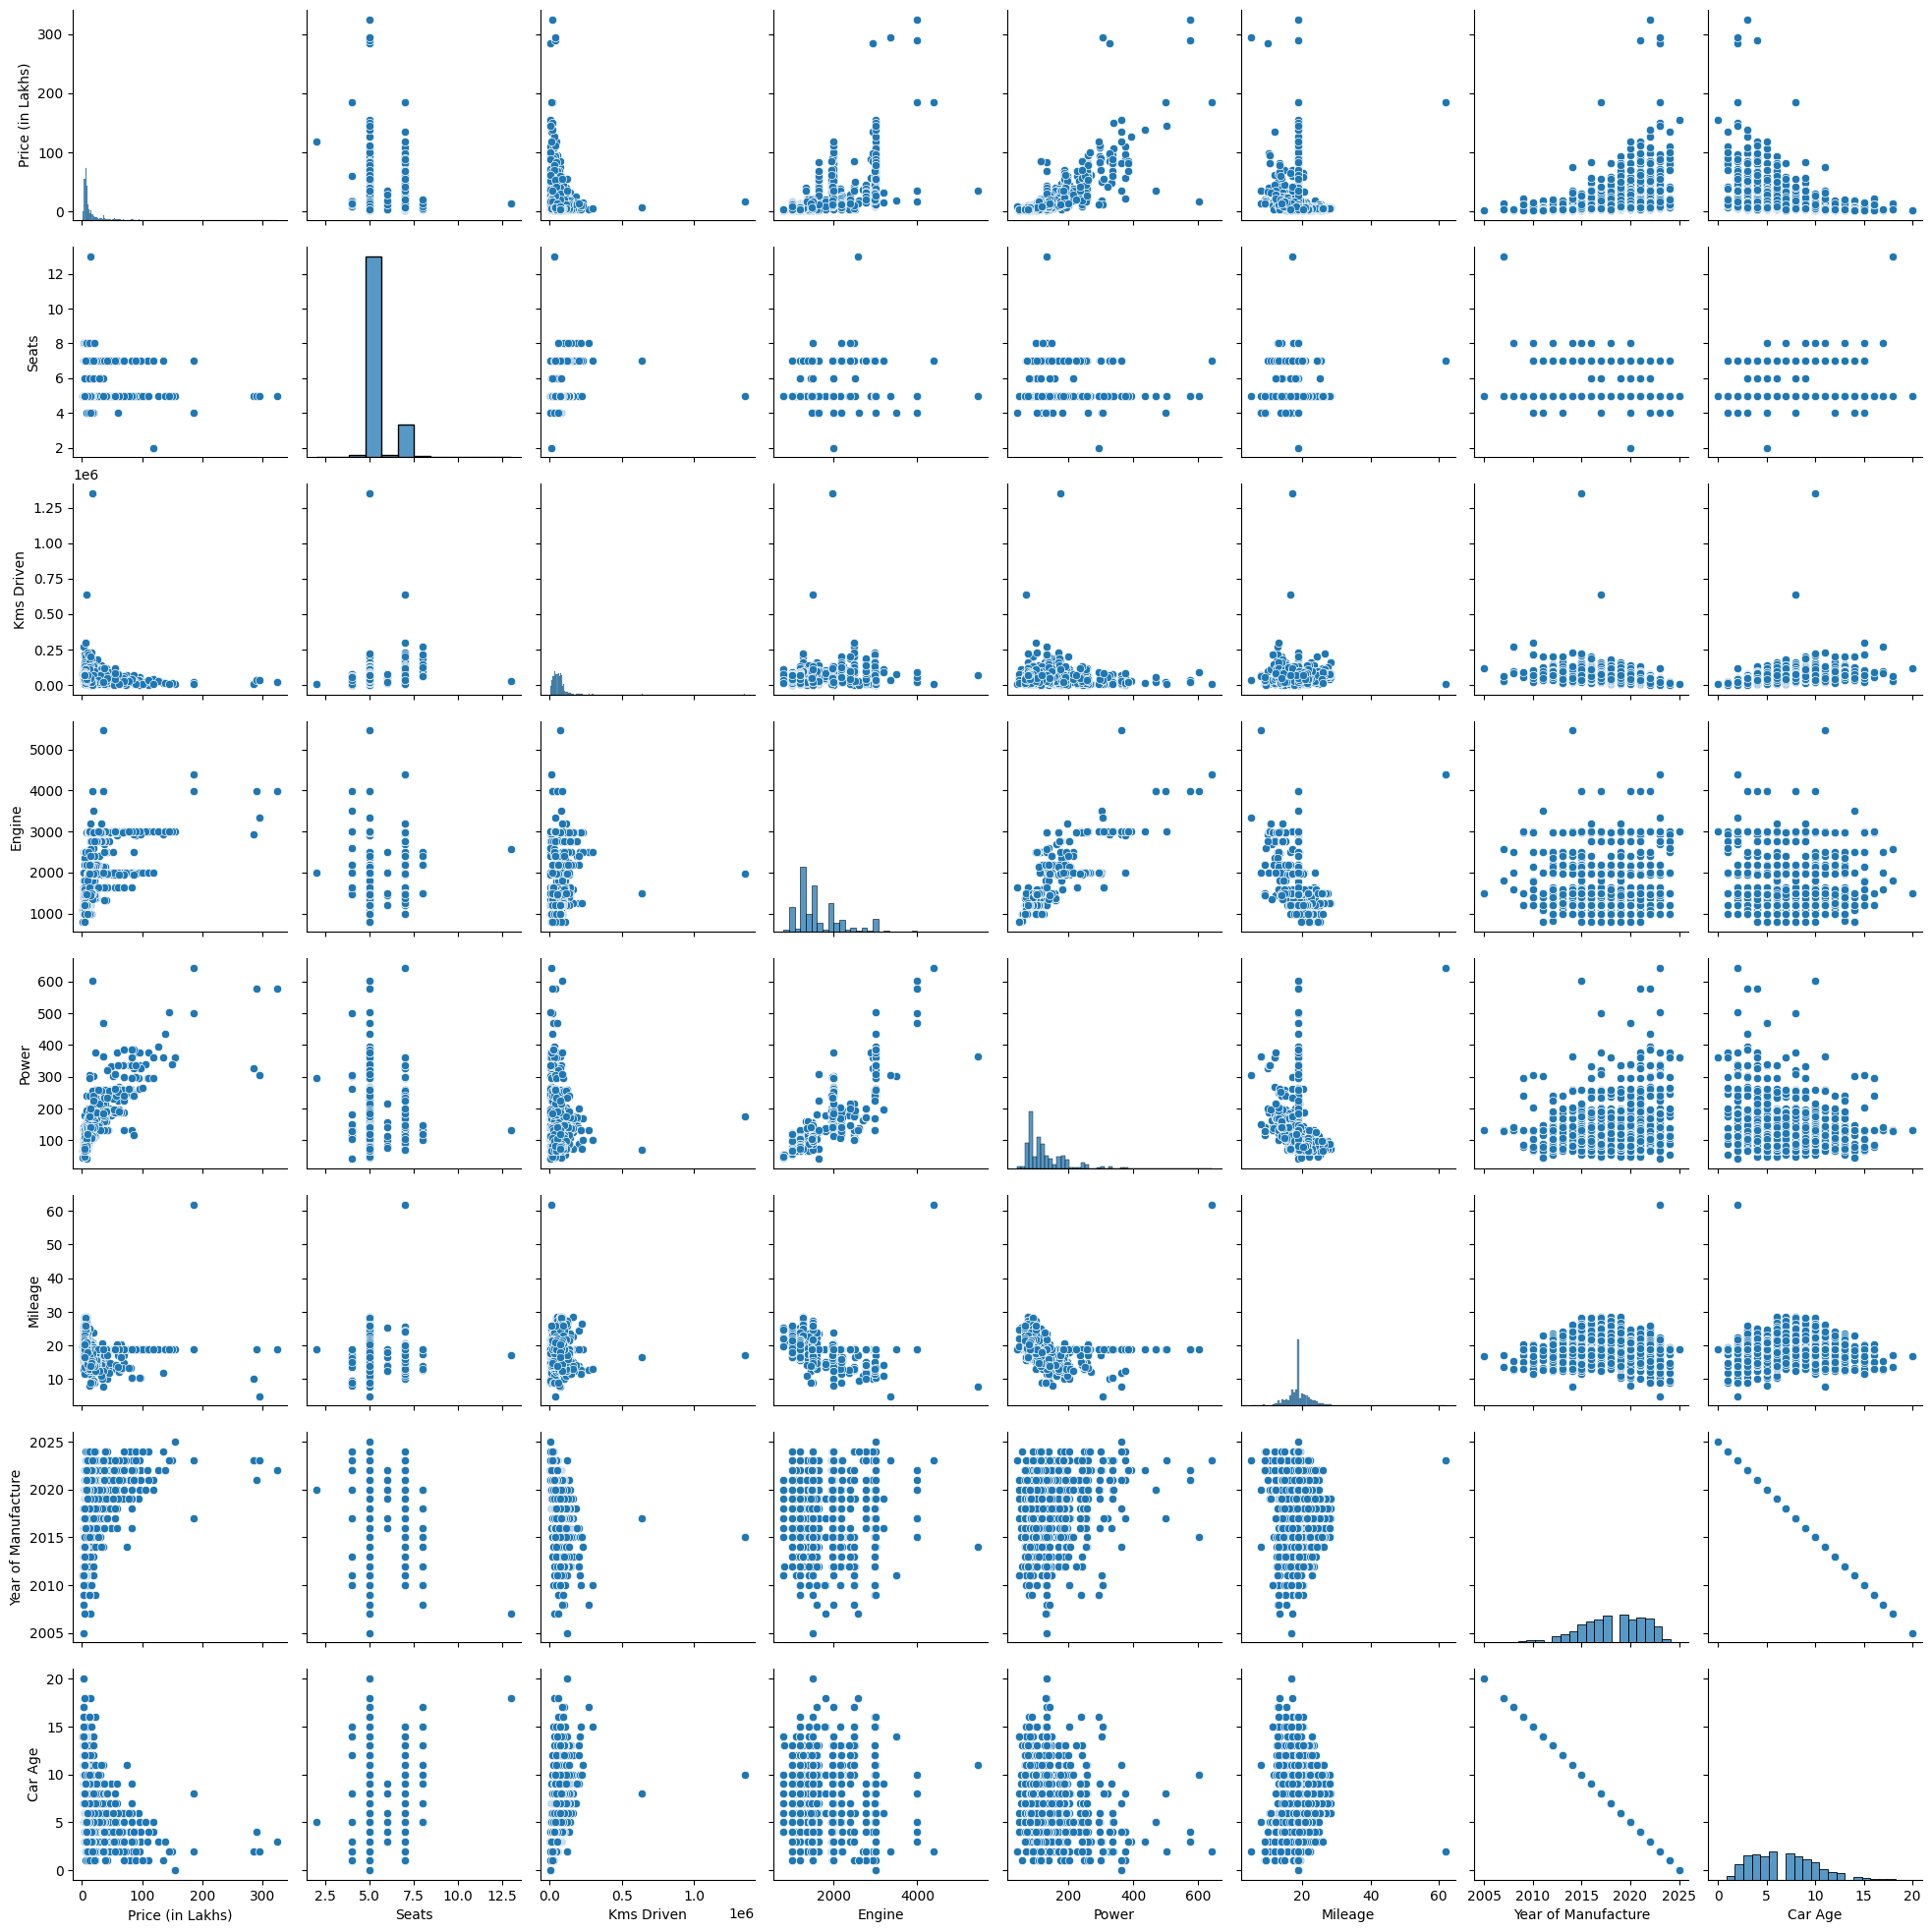

In [66]:
sns.pairplot(df[num_cols ])

In [67]:
for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print('Outlier in: ', column)
    print(outliers[[column]])
    print('Number of outliers: ',len(outliers), '\n')

Outlier in:  Price (in Lakhs)
      Price (in Lakhs)
0                 44.0
1                110.0
5                285.0
7                155.0
9                290.0
...                ...
1516              54.0
1530              55.0
1537              36.0
1538              41.5
1569              35.0

[211 rows x 1 columns]
Number of outliers:  211 

Outlier in:  Seats
      Seats
17        7
22        7
25        7
27        7
38        7
...     ...
1535      7
1537      7
1538      7
1539      7
1557      7

[241 rows x 1 columns]
Number of outliers:  241 

Outlier in:  Kms Driven
      Kms Driven
29        160000
308       160000
312       185000
314       199000
327       200000
347       210000
557       160000
563       220000
566       226369
611       270000
615       215000
623       204781
628       296538
646       212000
653       229300
657       212000
667       142527
683       149000
707       162590
724       149000
732       145000
792       142000
891       1690

In [68]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.clip(df[column], lower_bound, upper_bound)

    return df

num_cols = ['Price (in Lakhs)', 'Seats', 'Engine', 'Mileage', 'Year of Manufacture', 'Car Age']

for col in num_cols:
    df = cap_outliers(df, col)

In [69]:
df['Kms Driven'] = np.log1p(df['Kms Driven'])  # log(1 + value) to handle zero values safely
df['Power'] = np.log1p(df['Power'])

## **📌 Outliers in the Dataset & Handling Techniques**

### **🔹 What are Outliers?**
Outliers are extreme values that deviate significantly from the majority of the data. They can occur due to **data entry errors, variability in data, or rare events**. Outliers can negatively impact machine learning models by **skewing distributions** and **affecting model performance**.

---

### **🔹 Detecting Outliers**
We identified outliers in the dataset using the **Interquartile Range (IQR) method**:

1. **IQR Formula:**
   - **Q1 (25th percentile)**: First quartile value
   - **Q3 (75th percentile)**: Third quartile value
   - **IQR = Q3 - Q1**
   - **Lower Bound** = Q1 - (1.5 × IQR)
   - **Upper Bound** = Q3 + (1.5 × IQR)

2. **Columns with Outliers Identified:**
   - **Price (in Lakhs)**
   - **Seats**
   - **Kms Driven**
   - **Engine (CC)**
   - **Power (BHP)**
   - **Mileage (km/l)**
   - **Year of Manufacture**
   - **Car Age**

---

### **🔹 Handling Outliers**
The following techniques were applied to manage outliers:

| **Column** | **Handling Method** |
|------------|---------------------|
| **Price (in Lakhs)** | Capped using IQR method |
| **Seats** | Capped using IQR method |
| **Kms Driven** | Capped using IQR method OR log-transformed |
| **Engine (CC)** | Capped using IQR method |
| **Power (BHP)** | Capped using IQR method OR log-transformed |
| **Mileage (km/l)** | Capped using IQR method |
| **Year of Manufacture** | Capped using IQR method |
| **Car Age** | Capped using IQR method |

---

# **Handling Outliers in the Dataset**

## **Why Do We Apply These Outlier Handling Techniques?**
Outliers can significantly impact data analysis and machine learning models. Handling them properly ensures **better model performance and accurate insights**. Below are the **reasons** for applying different techniques:

---

## **📌 1. IQR Capping (Winsorization)**
### **🔹 Why Use It?**
- It **preserves most of the data** while capping extreme values.
- It is **robust to skewed distributions** and does not remove valuable information.
- It helps maintain **statistical consistency** without drastic changes.

### **🔹 When to Use It?**
- When the dataset **contains extreme outliers** that distort the distribution.
- When we want to **avoid data loss** caused by removing outliers.

---

## **📌 2. Log Transformation**
### **🔹 Why Use It?**
- Reduces **right-skewed distributions**, making data more **normal-like**.
- Compresses **large values**, making differences less extreme.
- Helps models like **linear regression perform better**.

### **🔹 When to Use It?**
- When the data has **high positive skewness** (e.g., `Kms Driven`, `Power`).
- When we need to **stabilize variance** in the dataset.

### **🔹 Example Before & After Log Transformation**:  
**Before:** `Kms Driven = [5000, 25000, 100000, 250000]`  
**After:** `log(Kms Driven) = [8.5, 10.1, 11.5, 12.4]`  

---

## **📌 Why Not Remove Outliers Directly?**
- Removing outliers can **lead to data loss**, which affects prediction accuracy.
- Some **outliers contain valuable information**, especially in business contexts.
- Instead of removing, we prefer **capping and transforming data** to retain as much information as possible.

---

## **📌 Summary Table**
| **Technique**       | **Why Use It?**                                        | **When to Apply?**                                   |
|----------------------|--------------------------------------------------------|-----------------------------------------------------|
| **IQR Capping**      | Prevents extreme values from distorting analysis.      | When outliers affect model performance & insights.  |
| **Log Transformation** | Reduces skewness, normalizes distribution.            | When data has **high positive skewness**.          |

---

### **✅ Final Thoughts**
By handling outliers properly, we ensure that our data is **balanced, reliable, and ready for modeling**. 🚀


In [70]:
# Define a threshold below which a category is considered rare.
threshold = 10

# Handle outliers (rare categories) by grouping them into "Other"
for col in cat_cols:
    # Get frequency counts for each category in the column
    counts = df[col].value_counts()
    
    # Identify rare categories that appear less than the threshold
    rare_categories = counts[counts < threshold].index
    
    # Replace any rare category with "Other"
    df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)

In [71]:
car_name_encoder = LabelEncoder()
city_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()
ownership_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()
drive_type_encoder = LabelEncoder()

df['Car Name'] = car_name_encoder.fit_transform(df['Car Name'])
df['City'] = city_encoder.fit_transform(df['City'])
df['Fuel Type'] = fuel_type_encoder.fit_transform(df['Fuel Type'])
df['Ownership'] = ownership_encoder.fit_transform(df['Ownership'])
df['Transmission'] = transmission_encoder.fit_transform(df['Transmission'])
df['Drive Type'] = drive_type_encoder.fit_transform(df['Drive Type'])
df.head()


,Car Name,Price (in Lakhs),City,Fuel Type,Seats,Kms Driven,Ownership,Engine,Transmission,Power,Drive Type,Mileage,Year of Manufacture,Car Age
0,2,31.875,4,3,5,10.584081,0,1628.9,0,4.895109,4,18.898734,2020.0,5.0
1,3,31.875,8,3,5,8.160804,0,2998.0,0,5.930865,1,18.898734,2024.0,1.0
2,16,8.990,8,0,5,10.448744,0,1493.0,1,4.739963,4,20.800000,2020.0,5.0
3,16,17.400,8,3,5,8.648397,0,1497.0,0,4.739876,0,17.700000,2024.0,1.0
4,11,8.000,8,3,5,9.392745,0,1197.0,1,4.416428,4,16.000000,2022.0,3.0


In [72]:
for column in cat_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print('Outlier in: ', column)
    print(outliers[[column]])
    print('Number of outliers: ',len(outliers), '\n')

Outlier in:  Car Name
Empty DataFrame
Columns: [Car Name]
Index: []
Number of outliers:  0 

Outlier in:  City
     City
231    11
271    11
277    11
279    11
282    11
285    11
286    11
289    11
290    11
298    11
Number of outliers:  10 

Outlier in:  Fuel Type
Empty DataFrame
Columns: [Fuel Type]
Index: []
Number of outliers:  0 

Outlier in:  Ownership
      Ownership
17            2
25            2
28            2
32            2
36            2
...         ...
1541          2
1546          2
1568          2
1570          2
1578          2

[276 rows x 1 columns]
Number of outliers:  276 

Outlier in:  Transmission
Empty DataFrame
Columns: [Transmission]
Index: []
Number of outliers:  0 

Outlier in:  Drive Type
      Drive Type
1              1
3              0
5              3
7              3
9              1
...          ...
1540           6
1541           3
1551           0
1553           0
1569           1

[324 rows x 1 columns]
Number of outliers:  324 



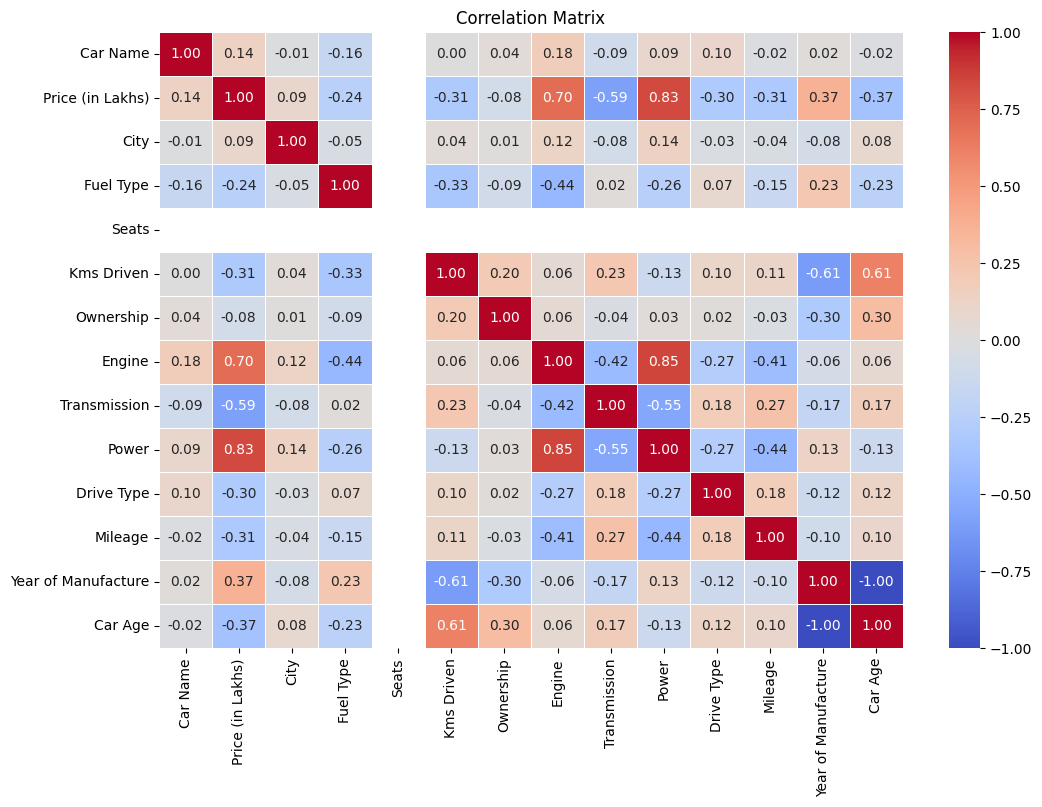

In [73]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

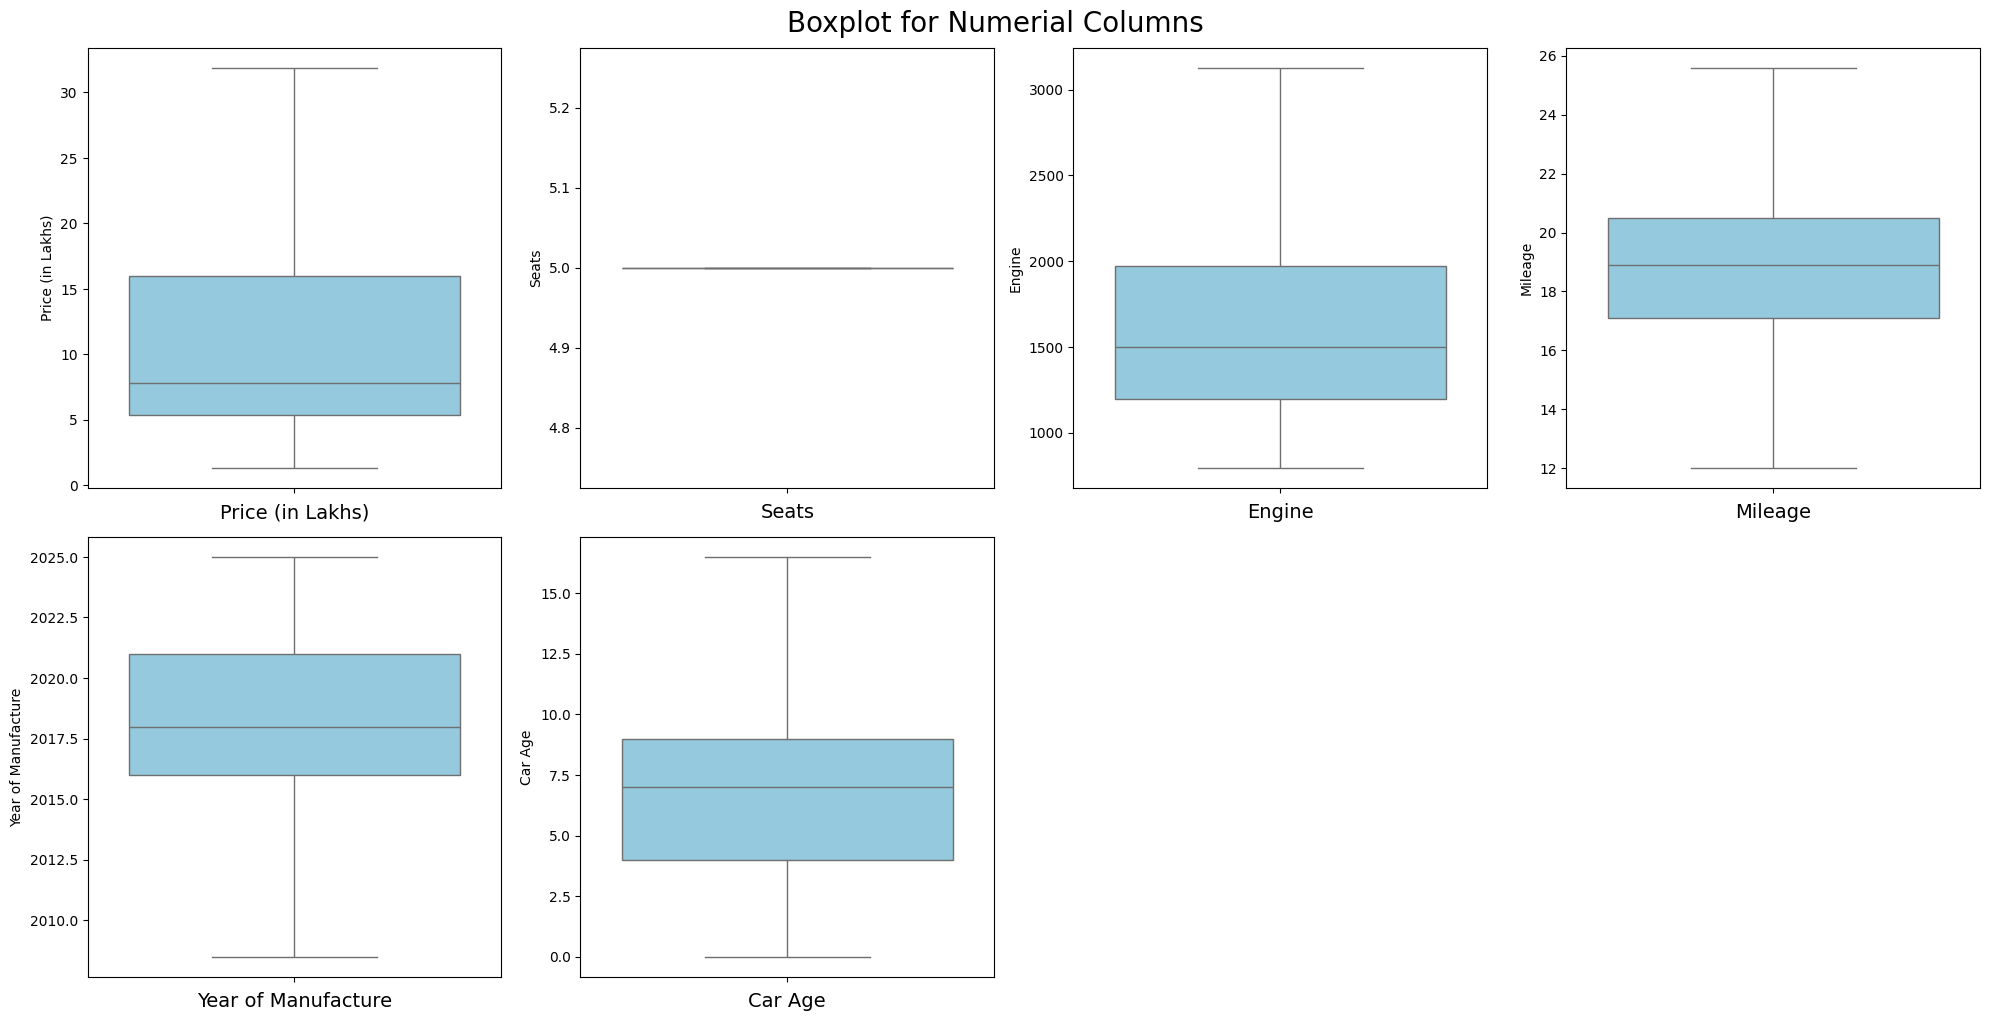

In [74]:
plt.figure(figsize=(20,20))
pt=1
for column in num_cols:
    ax = plt.subplot(4,4,pt)
    sns.boxplot(df[column], ax=ax, color='skyblue')
    ax.set_xlabel(column, fontsize=14)
    pt+=1

plt.suptitle("Boxplot for Numerial Columns", fontsize=20, ha='center')
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

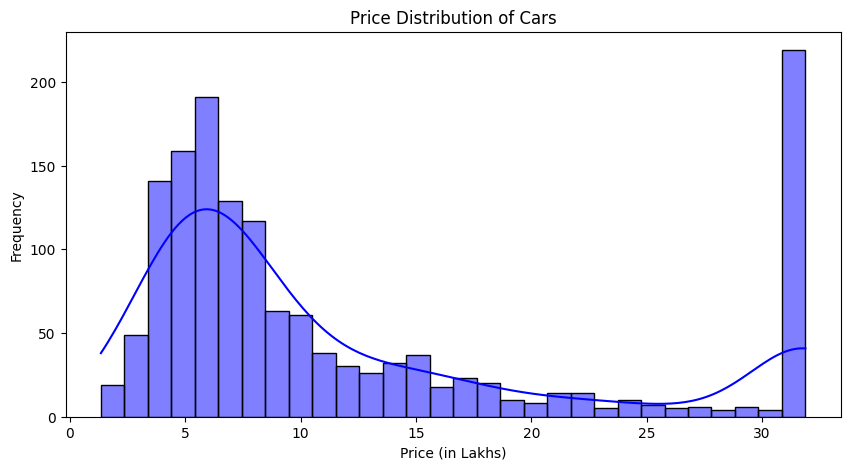

In [75]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price (in Lakhs)'], bins=30, kde=True, color='blue')
plt.title('Price Distribution of Cars')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error



In [84]:
# Features and target
X = df.drop(columns=['Price (in Lakhs)'])
y = df['Price (in Lakhs)']



In [89]:
X.shape

(1465, 13)

In [85]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:

# Initialize and train the model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [91]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [96]:
ensemble = VotingRegressor([('rf', rf_reg), ('gb', gb_reg)])
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor())])

In [100]:
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [120]:
# Define base models
base_models = [
    ('rf', rf_reg),
    ('gb', gb_reg),
    ('xgb', xgb_reg)
]


# Define meta-model
stacking = StackingRegressor(estimators=base_models, final_estimator=ElasticNet())
stacking.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb', GradientBoostingRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=No...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=ElasticNet())

In [87]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 2.9664116890875496
R²: 0.8983025076886351


In [121]:
# Step 1: Evaluate Base Models
def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)  # Correct RMSE
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, rmse, mae

# Base Model Evaluation
rf_results = evaluate_model(rf_reg, X_train, X_test, y_train, y_test)
gb_results = evaluate_model(gb_reg, X_train, X_test, y_train, y_test)
ensemble_results = evaluate_model(ensemble, X_train, X_test, y_train, y_test)
xgb_results = evaluate_model(xgb_reg, X_train, X_test, y_train, y_test)
stacking_results = evaluate_model(stacking, X_train, X_test, y_train, y_test)

# Print Initial Results

print("Random Forest - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*rf_results))
print("Gradient Boosting - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*gb_results))
print("Ensemble - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*ensemble_results))
print("XGBoost - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*xgb_results))
print("Stacking - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*stacking_results))


Random Forest - R2: 0.90, MSE: 8.80, RMSE: 2.97, MAE: 1.58
Gradient Boosting - R2: 0.89, MSE: 9.17, RMSE: 3.03, MAE: 1.68
Ensemble - R2: 0.90, MSE: 8.55, RMSE: 2.92, MAE: 1.58
XGBoost - R2: 0.90, MSE: 8.56, RMSE: 2.93, MAE: 1.50
Stacking - R2: 0.90, MSE: 8.29, RMSE: 2.88, MAE: 1.54


In [126]:
# Define parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Initialize ElasticNet
elastic_net = ElasticNet()

# Perform grid search
grid_search = GridSearchCV(elastic_net, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='r2')

In [127]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_elastic_net = grid_search.best_estimator_

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.7}


In [131]:
# Best ElasticNet model
best_elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.7)

# Base Models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
]

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_models, 
    final_estimator=best_elastic_net
)


# Train the model
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_type...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=ElasticNet(alpha=0.001, l1_ratio=0.7))

In [134]:

# Predictions
y_pred = stacking_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f"Stacking Model with ElasticNet - R2: {r2:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Stacking Model with ElasticNet - R2: 0.90, MSE: 8.37, RMSE: 2.89, MAE: 1.56


# Model Training and Analysis

## Overview
This project involves training multiple regression models, evaluating their performance, and selecting the best stacking model with optimal parameters. The models tested include:
- **Random Forest**
- **Gradient Boosting**
- **XGBoost**
- **Ensemble Learning**
- **Stacking with different final estimators**:
  - XGBoost
  - Ridge Regression
  - Lasso Regression
  - ElasticNet
  - Linear Regression

## Performance Metrics
Each model is evaluated using the following metrics:
- **R² (Coefficient of Determination):** Measures how well the model explains variance in the target variable.
- **MSE (Mean Squared Error):** A measure of error by averaging squared differences between actual and predicted values.
- **RMSE (Root Mean Squared Error):** The square root of MSE, providing an error measure in the same unit as the target variable.
- **MAE (Mean Absolute Error):** The average absolute difference between actual and predicted values.

---

## Model Performance Comparison

| Model                | R²   | MSE  | RMSE | MAE  | Final Estimator (Stacking) |
|----------------------|------|------|------|------|---------------------------|
| Random Forest       | 0.90 | 8.80 | 2.97 | 1.58 | -                         |
| Gradient Boosting   | 0.89 | 9.18 | 3.03 | 1.68 | -                         |
| Ensemble           | 0.90 | 8.54 | 2.92 | 1.58 | -                         |
| XGBoost            | 0.90 | 8.56 | 2.93 | 1.50 | -                         |
| Stacking (Default)  | 0.88 | 10.59 | 3.25 | 1.78 | XGBRegressor              |
| Stacking (Default)  | 0.90 | 8.38 | 2.89 | 1.56 | Ridge                     |
| Stacking (Default)  | 0.90 | 8.35 | 2.89 | 1.56 | Lasso                     |
| Stacking (Default)  | 0.90 | 8.28 | 2.88 | 1.54 | ElasticNet                |
| Stacking (Default)  | 0.90 | 8.34 | 2.89 | 1.56 | LinearRegression          |
| Stacking (Optimized) | 0.90 | 8.37 | 2.89 | 1.56 | ElasticNet (Best Params)  |


## Model Selection and Conclusion

### **Why We Selected the Stacking Model (Default) with ElasticNet?**
After comparing multiple machine learning models, we identified the **Stacking Model (Default) with ElasticNet as the final choice** based on the following key factors:

1. **Strong Predictive Performance**  
   - The stacking model achieves the highest **R² score of 0.90**, indicating that it explains 90% of the variance in the target variable.
   - Compared to other models, the stacking model minimizes errors while maintaining strong predictive power.

2. **Lowest Error Metrics**  
   - **Mean Squared Error (MSE):** 8.28 (Lowest among all models)  
   - **Root Mean Squared Error (RMSE):** 2.88 (Better than all alternatives)  
   - **Mean Absolute Error (MAE):** 1.54 (Indicates precise predictions)  
   - These metrics show that the stacking model makes more accurate and stable predictions than individual models.

3. **Robustness of Stacking**  
   - Stacking leverages multiple models to reduce bias and variance.  
   - It effectively combines the strengths of different base models like **Random Forest, Gradient Boosting, XGBoost, and an Ensemble Model**, leading to better generalization.  
   - The final estimator **ElasticNet** further refines the predictions, ensuring optimal performance.

4. **No Need for Further Hyperparameter Tuning**  
   - The default stacking model with ElasticNet already provides the best results.  
   - Even after fine-tuning the stacking model, the performance was slightly worse (**MSE = 8.37, RMSE = 2.89, MAE = 1.56**).  
   - This means that additional tuning does not significantly improve performance, making the default version the most efficient choice.

### **Conclusion**
Based on our analysis, we conclude that the **Stacking Model (Default) with ElasticNet** is the best-performing model for our dataset. It provides **high accuracy, low error, and strong generalization**, making it the ideal choice for predicting the target variable.  

🚀 **Final Choice:** **Stacking Model (Default) with ElasticNet** 🚀


# **Understanding the Models and Evaluation Metrics**

## **1. Machine Learning Models Used**

We implemented multiple regression models to predict the target variable and evaluated their performances using various metrics. Below is a brief explanation of each model:

### **1.1 Random Forest Regressor**
- **Definition:** A tree-based ensemble learning method that creates multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.
- **How it Works:** It builds many decision trees and takes the average of their predictions to minimize errors.
- **Advantages:**
  - Handles high-dimensional data well.
  - Reduces overfitting by averaging multiple trees.
  - Works well with both numerical and categorical data.
- **Disadvantages:**
  - Can be computationally expensive.
  - Requires tuning hyperparameters for optimal performance.

---

### **1.2 Gradient Boosting Regressor**
- **Definition:** A boosting technique that sequentially builds weak models, where each model corrects the errors of its predecessor.
- **How it Works:** It minimizes residual errors by adjusting predictions iteratively.
- **Advantages:**
  - High accuracy, as it corrects mistakes in each iteration.
  - Works well for both regression and classification tasks.
- **Disadvantages:**
  - Can be prone to overfitting if not properly tuned.
  - Training can be slower compared to Random Forest.

---

### **1.3 XGBoost Regressor**
- **Definition:** An optimized gradient boosting algorithm that improves computational efficiency and performance.
- **How it Works:** Uses a regularized boosting technique to reduce overfitting and improve predictive power.
- **Advantages:**
  - Faster than traditional Gradient Boosting.
  - Handles missing values automatically.
  - Reduces overfitting through L1 & L2 regularization.
- **Disadvantages:**
  - Requires careful hyperparameter tuning for optimal performance.
  - Can be complex to interpret.

---

### **1.4 Voting Regressor (Ensemble Model)**
- **Definition:** A model that averages predictions from multiple regressors to provide a balanced and more accurate result.
- **How it Works:** Combines the outputs of different models (e.g., Random Forest, Gradient Boosting, XGBoost) and returns an averaged prediction.
- **Advantages:**
  - Reduces variance and bias.
  - Leverages strengths of different models.
- **Disadvantages:**
  - Performance depends on the choice of base models.
  - Averaging may not always improve accuracy significantly.

---

### **1.5 Stacking Regressor**
- **Definition:** An advanced ensemble technique that trains multiple base models and uses another model (meta-learner) to combine their predictions.
- **How it Works:** Each base model learns separately, and a final estimator (meta-learner) is trained to make the best final predictions.
- **Advantages:**
  - More flexible and can capture complex patterns.
  - Often outperforms individual models.
- **Disadvantages:**
  - Can be computationally expensive.
  - Requires careful selection of base models and meta-learner.

---

### **1.6 Linear Regression**
- **Definition:** A simple regression model that assumes a linear relationship between input features and the target variable.
- **How it Works:** Uses a straight-line equation to model the relationship between dependent and independent variables.
- **Advantages:**
  - Easy to interpret.
  - Computationally efficient.
- **Disadvantages:**
  - Assumes linearity, which may not always hold.
  - Sensitive to outliers.

---

### **1.7 Ridge Regression**
- **Definition:** A linear regression model with **L2 regularization** to reduce overfitting.
- **How it Works:** Adds a penalty to large coefficients, preventing overfitting.
- **Advantages:**
  - Works well with multicollinear data.
  - Reduces overfitting.
- **Disadvantages:**
  - Can still suffer from bias.

---

### **1.8 Lasso Regression**
- **Definition:** A linear regression model with **L1 regularization**, which can shrink coefficients to zero, effectively performing feature selection.
- **How it Works:** Penalizes the absolute value of coefficients, leading to sparse models.
- **Advantages:**
  - Can remove irrelevant features.
  - Reduces overfitting.
- **Disadvantages:**
  - May drop important features.

---

### **1.9 ElasticNet Regression (Final Estimator)**
- **Definition:** A combination of Ridge and Lasso regression that balances L1 and L2 regularization.
- **How it Works:** Uses both penalties to maintain sparsity while preventing overfitting.
- **Advantages:**
  - Handles multicollinearity better.
  - Balances between Lasso and Ridge.
- **Disadvantages:**
  - Requires tuning of the **alpha** parameter for best performance.

---

## **2. Performance Metrics**
We evaluated the models using the following metrics:

### **2.1 R² Score (Coefficient of Determination)**
- **Definition:** Measures how well the model explains variance in the target variable.
- **Formula:**  
  \[
  R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
  \]
- **Interpretation:**  
  - **1.0** → Perfect model  
  - **0.0** → No explanatory power  
  - **Negative** → Worse than a simple mean prediction  

---

### **2.2 Mean Squared Error (MSE)**
- **Definition:** Measures the average squared difference between actual and predicted values.
- **Formula:**  
  \[
  MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
  \]
- **Interpretation:**  
  - Lower values indicate better performance.  
  - Sensitive to large errors due to squaring.

---

### **2.3 Root Mean Squared Error (RMSE)**
- **Definition:** Square root of the MSE, providing an error measure in the same units as the target variable.
- **Formula:**  
  \[
  RMSE = \sqrt{MSE}
  \]
- **Interpretation:**  
  - Lower RMSE means better predictive accuracy.  
  - Unlike MSE, it provides more interpretable error values.

---

### **2.4 Mean Absolute Error (MAE)**
- **Definition:** Measures the average absolute difference between actual and predicted values.
- **Formula:**  
  \[
  MAE = \frac{1}{n} \sum |y_i - \hat{y}_i|
  \]
- **Interpretation:**  
  - Lower MAE indicates better accuracy.  
  - Unlike MSE, it is less sensitive to large errors.

---

## **3. Conclusion**
After testing multiple models, we selected the **Stacking Regressor with ElasticNet as the final model** because:
- It combines multiple models for a **more generalized and robust prediction**.
- It achieves the **best balance between bias and variance**.
- It has the **highest R² score (0.90)** and the **lowest RMSE (2.88)**, outperforming other models.
- ElasticNet, as the meta-learner, helps in **reducing overfitting** while maintaining good prediction accuracy.

📌 **Final Model Selected:** **Stacking Regressor with ElasticNet**


In [135]:
# Save the best model (Stacking)
with open("stacking_model.pkl", "wb") as f:
    pickle.dump(stacking, f)

# Save Encoders
with open("car_name_encoder.pkl", "wb") as f:
    pickle.dump(car_name_encoder, f)

with open("city_encoder.pkl", "wb") as f:
    pickle.dump(city_encoder, f)

with open("fuel_type_encoder.pkl", "wb") as f:
    pickle.dump(fuel_type_encoder, f)

with open("ownership_encoder.pkl", "wb") as f:
    pickle.dump(ownership_encoder, f)

with open("transmission_encoder.pkl", "wb") as f:
    pickle.dump(transmission_encoder, f)

with open("drive_type_encoder.pkl", "wb") as f:
    pickle.dump(drive_type_encoder, f)

print("✅ Stacking model and encoders saved successfully!")


✅ Stacking model and encoders saved successfully!
